In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lstm-datasets-multivariate-univariate/pollution_test_data1.csv
/kaggle/input/lstm-datasets-multivariate-univariate/LSTM-Multivariate_pollution.csv


In [2]:
df=pd.read_csv('/kaggle/input/lstm-datasets-multivariate-univariate/LSTM-Multivariate_pollution.csv')

In [3]:
df.head()

,date,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
0,2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
1,2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2,2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
3,2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
4,2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [4]:
df.isnull().sum()

date         0
pollution    0
dew          0
temp         0
press        0
wnd_dir      0
wnd_spd      0
snow         0
rain         0
dtype: int64

In [5]:
from sklearn.preprocessing import OneHotEncoder
df['date']=pd.to_datetime(df['date'])
# categorical data
enc=OneHotEncoder()
new_wnd_dir=enc.fit_transform(df[["wnd_dir"]])
cols=enc.get_feature_names_out(input_features=["wnd_dir"])
encoded=pd.DataFrame(data=new_wnd_dir.toarray(), columns=cols)
print(encoded)

       wnd_dir_NE  wnd_dir_NW  wnd_dir_SE  wnd_dir_cv
0             0.0         0.0         1.0         0.0
1             0.0         0.0         1.0         0.0
2             0.0         0.0         1.0         0.0
3             0.0         0.0         1.0         0.0
4             0.0         0.0         1.0         0.0
...           ...         ...         ...         ...
43795         0.0         1.0         0.0         0.0
43796         0.0         1.0         0.0         0.0
43797         0.0         1.0         0.0         0.0
43798         0.0         1.0         0.0         0.0
43799         0.0         1.0         0.0         0.0

[43800 rows x 4 columns]


In [6]:
# noww to add the data to the dataset
df=pd.concat([df,encoded], axis=1)
df=df.drop(columns=["wnd_dir"])
df.describe()

,date,pollution,dew,temp,press,wnd_spd,snow,rain,wnd_dir_NE,wnd_dir_NW,wnd_dir_SE,wnd_dir_cv
count,43800,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000
mean,2012-07-02 11:30:00,94.013516,1.828516,12.459041,1016.447306,23.894307,0.052763,0.195023,0.114064,0.322603,0.349087,0.214247
min,2010-01-02 00:00:00,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2011-04-03 05:45:00,24.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2012-07-02 11:30:00,68.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2013-10-01 17:15:00,132.250000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,2014-12-31 23:00:00,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000,1.000000,1.000000,1.000000,1.000000
std,NaN,92.252276,14.429326,12.193384,10.271411,50.022729,0.760582,1.416247,0.317893,0.467477,0.476687,0.410303


In [7]:
df=df.reset_index()
print(df)

       index                date  pollution  dew  temp   press  wnd_spd  snow  \
0          0 2010-01-02 00:00:00      129.0  -16  -4.0  1020.0     1.79     0   
1          1 2010-01-02 01:00:00      148.0  -15  -4.0  1020.0     2.68     0   
2          2 2010-01-02 02:00:00      159.0  -11  -5.0  1021.0     3.57     0   
3          3 2010-01-02 03:00:00      181.0   -7  -5.0  1022.0     5.36     1   
4          4 2010-01-02 04:00:00      138.0   -7  -5.0  1022.0     6.25     2   
...      ...                 ...        ...  ...   ...     ...      ...   ...   
43795  43795 2014-12-31 19:00:00        8.0  -23  -2.0  1034.0   231.97     0   
43796  43796 2014-12-31 20:00:00       10.0  -22  -3.0  1034.0   237.78     0   
43797  43797 2014-12-31 21:00:00       10.0  -22  -3.0  1034.0   242.70     0   
43798  43798 2014-12-31 22:00:00        8.0  -22  -4.0  1034.0   246.72     0   
43799  43799 2014-12-31 23:00:00       12.0  -21  -3.0  1034.0   249.85     0   

       rain  wnd_dir_NE  wn

**VISUALIZATION**

Text(0, 0.5, 'Pressure')

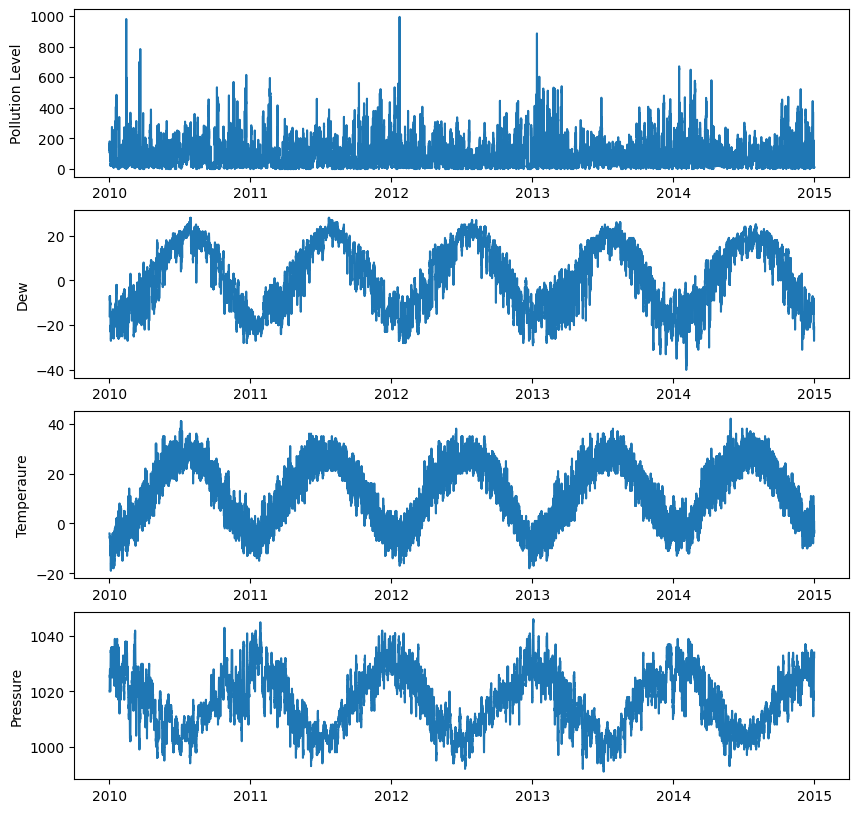

In [8]:
import matplotlib.pyplot as plt
fig,axs=plt.subplots(4,1,figsize=(10,10), sharex=False)
axs[0].plot(df['date'],df['pollution'],label='Pollution')
axs[0].set_ylabel('Pollution Level')
axs[1].plot(df['date'],df['dew'],label='Dew')
axs[1].set_ylabel('Dew')
axs[2].plot(df['date'],df['temp'],label='Temperature')
axs[2].set_ylabel('Temperaure')
axs[3].plot(df['date'],df['press'],label='Pressure')
axs[3].set_ylabel('Pressure')

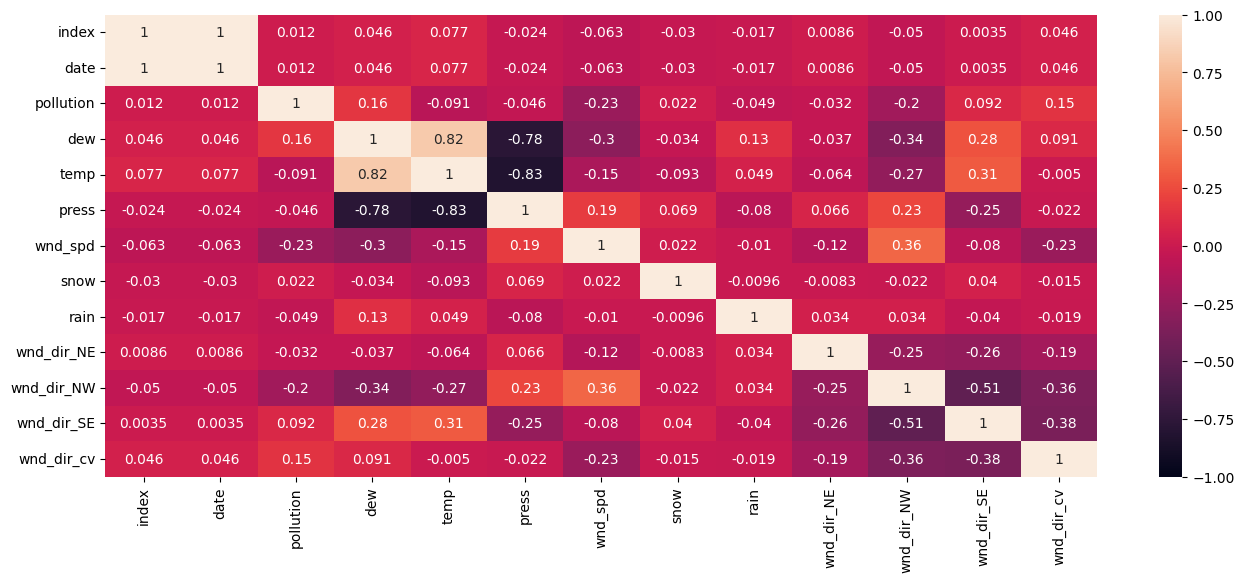

In [9]:
import seaborn as sns
plt.figure(figsize=(16,6))
heatmap=sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True)

In [10]:
df.set_index('date', inplace=True)

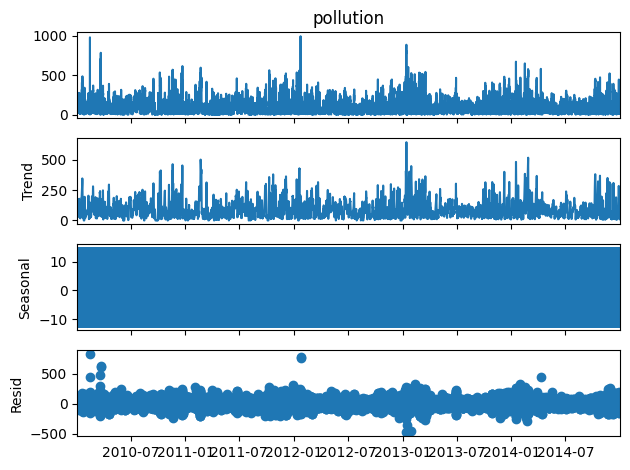

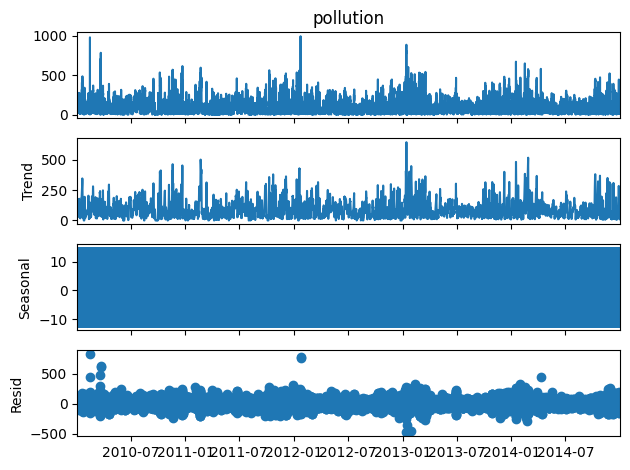

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(df['pollution'] , model='additive')
result.plot()

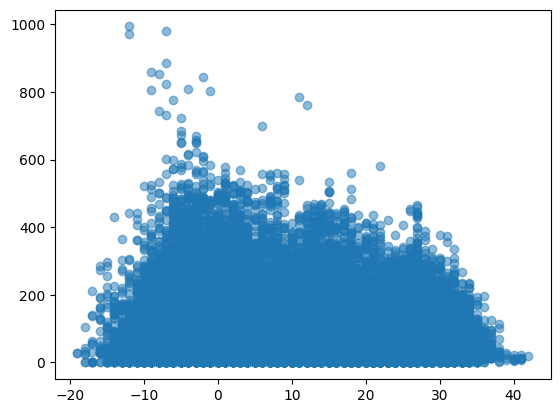

In [12]:
plt.scatter(df['temp'], df['pollution'], alpha =0.5)

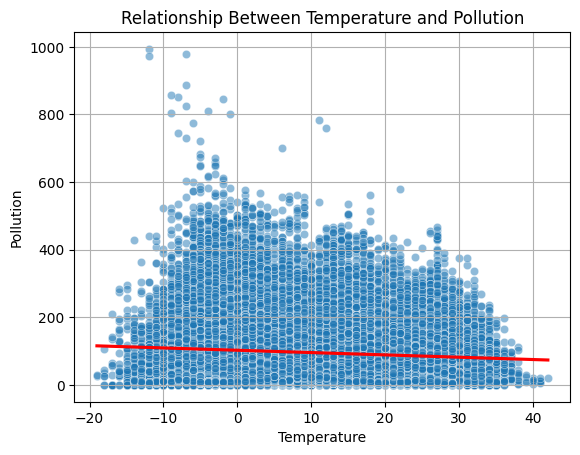

In [13]:
sns.scatterplot(x='temp', y='pollution', data=df, alpha=0.5)
sns.regplot(x='temp', y='pollution', data=df, scatter=False, color='red')
plt.xlabel('Temperature')
plt.ylabel('Pollution')
plt.title('Relationship Between Temperature and Pollution')
plt.grid(True)
plt.show()

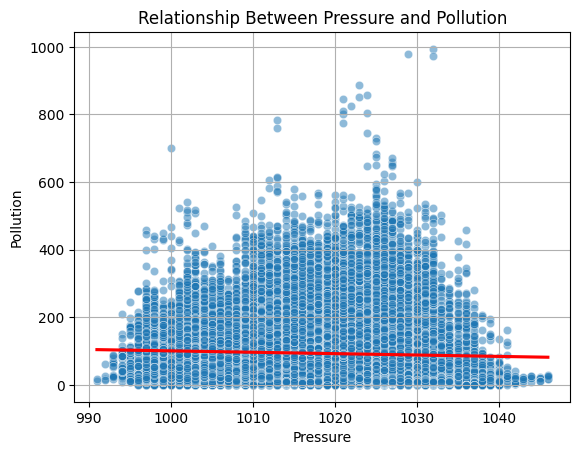

In [14]:
sns.scatterplot(x='press', y='pollution', data=df, alpha=0.5)
sns.regplot(x='press', y='pollution', data=df, scatter=False, color='red')
plt.xlabel('Pressure')
plt.ylabel('Pollution')
plt.title('Relationship Between Pressure and Pollution')
plt.grid(True)
plt.show()

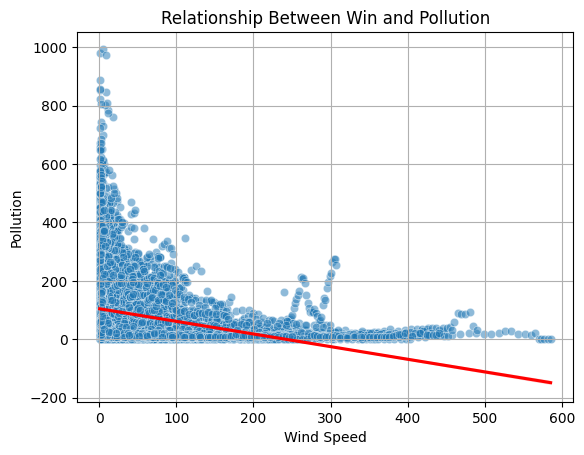

In [15]:
sns.scatterplot(x='wnd_spd', y='pollution', data=df, alpha=0.5)
sns.regplot(x='wnd_spd', y='pollution', data=df, scatter=False, color='red')
plt.xlabel('Wind Speed')
plt.ylabel('Pollution')
plt.title('Relationship Between Win and Pollution')
plt.grid(True)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

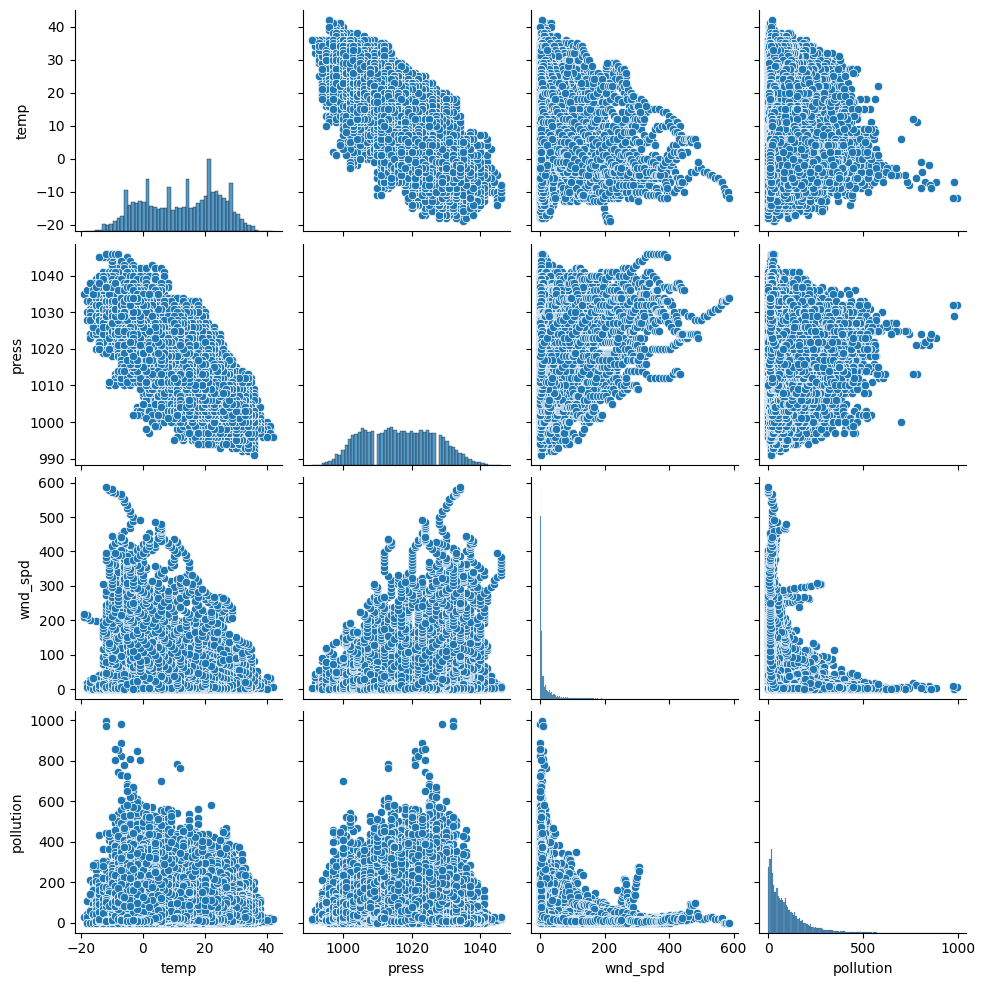

In [16]:
sns.pairplot(df[['temp', 'press', 'wnd_spd', 'pollution']])
plt.show()

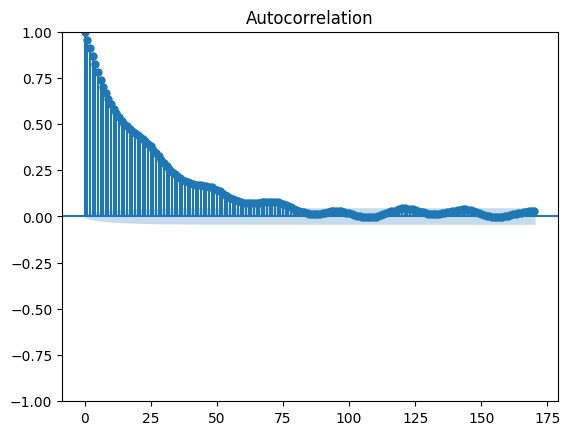

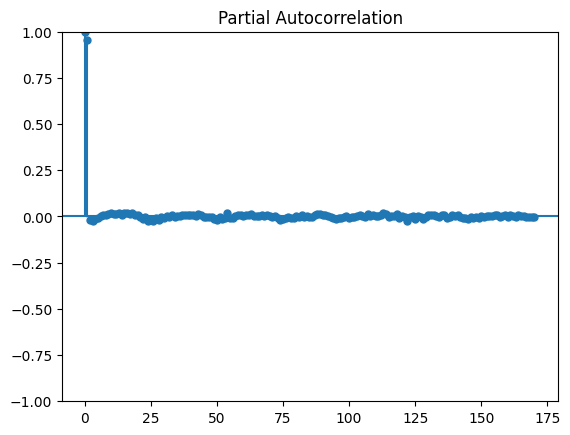

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['pollution'], lags=170)
plot_pacf(df['pollution'], lags=170)
plt.show()

**FORECASTING**

In [18]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.linear_model import LinearRegression
def create_lagged_features(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)
pollution_data = df['pollution'].values
window_sizes = [15, 20, 25, 30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
best_score = float('inf')
best_window_size = None
for window_size in window_sizes:
    X, y = create_lagged_features(pollution_data, window_size)
    model = LinearRegression()
    tscv = TimeSeriesSplit(n_splits=5)
    scores = cross_val_score(model, X, y, cv=tscv, scoring='neg_mean_squared_error')
    avg_score = -scores.mean()
    print(f"Window Size: {window_size}, Avg MSE: {avg_score}")
    if avg_score < best_score:
        best_score = avg_score
        best_window_size = window_size
print(f"Best Window Size: {best_window_size}, Best Avg MSE: {best_score}")


Window Size: 15, Avg MSE: 702.6256000013136
Window Size: 20, Avg MSE: 702.2905496919948
Window Size: 25, Avg MSE: 701.9273154637542
Window Size: 30, Avg MSE: 701.3315175236255
Window Size: 35, Avg MSE: 701.7953248188871
Window Size: 40, Avg MSE: 701.714309185549
Window Size: 45, Avg MSE: 701.9082066262985
Window Size: 50, Avg MSE: 702.480818050143
Window Size: 55, Avg MSE: 703.1584903908837
Window Size: 60, Avg MSE: 704.8651269433083
Window Size: 65, Avg MSE: 704.9222060967915
Window Size: 70, Avg MSE: 705.1905209932017
Window Size: 75, Avg MSE: 704.9629084492874
Window Size: 80, Avg MSE: 705.0326476719501
Window Size: 85, Avg MSE: 705.1843473931264
Window Size: 90, Avg MSE: 704.9639620023752
Window Size: 95, Avg MSE: 705.4178090303104
Window Size: 100, Avg MSE: 705.9500069067722
Best Window Size: 30, Best Avg MSE: 701.3315175236255


In [19]:
# first we need to find the temporal sequences to predict the data
t_i=7*24
X_tmp = np.array([df[i:i+t_i].drop(columns=["pollution"]).to_numpy() for i in range(len(df)-t_i)])
y_tmp = np.array([df.iloc[i+t_i]["pollution"] for i in range(len(df)-t_i)])

In [20]:
i = int(len(df) * 0.8)
X_train, y_train = X_tmp[:i, :], y_tmp[:i]
X_val, y_val = X_tmp[i:, :], y_tmp[i:]

**NORMALIZATION**

In [21]:
X_train_mean = X_train.mean()
X_train_std = X_train.std()
X_train = (X_train - X_train_mean) / X_train_std
X_val = (X_val - X_train_mean) / X_train_std
y_train_mean = y_train.mean()
y_train_std = y_train.std()
y_train = (y_train - y_train_mean) / y_train_std
y_val = (y_val - y_train_mean) / y_train_std

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Creating a sequential model
model = Sequential()

# Adding the first LSTM layer with 64 units, returning sequences, and specifying input shape
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))

# Adding dropout regularization to prevent overfitting
model.add(Dropout(0.2))

# Adding a second LSTM layer with 32 units and not returning sequences
model.add(LSTM(32, return_sequences=True))

# Adding dropout regularization to prevent overfitting
model.add(Dropout(0.2))

# Adding a second LSTM layer with 16 units and not returning sequences
model.add(LSTM(16, return_sequences=False))

# Adding a dense output layer with 1 unit (regression problem)
model.add(Dense(units=1))

# Compiling the model with the Adam optimizer and mean squared error loss
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Training the model on the training data and validating on the validation data
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val))

2024-06-18 10:48:31.635891: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-18 10:48:31.636048: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-18 10:48:31.812521: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 188s 168ms/step - loss: 1.0139 - val_loss: 1.0445
Epoch 2/30
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 184s 168ms/step - loss: 1.0078 - val_loss: 1.0453
Epoch 3/30
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 187s 170ms/step - loss: 0.9850 - val_loss: 1.0454
Epoch 4/30
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 185s 169ms/step - loss: 0.9876 - val_loss: 1.0444
Epoch 5/30
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 184s 168ms/step - loss: 0.9761 - val_loss: 1.0444
Epoch 6/30
 911/1095 ━━━━━━━━━━━━━━━━━━━━ 27s 152ms/step - loss: 0.9906

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1095/1095 ━━━━━━━━━━━━━━━━━━━━ 184s 168ms/step - loss: 1.0054 - val_loss: 1.0448
Epoch 8/30
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 186s 170ms/step - loss: 1.0013 - val_loss: 1.0445
Epoch 9/30
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 186s 170ms/step - loss: 0.9872 - val_loss: 1.0448
Epoch 10/30
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 200s 168ms/step - loss: 0.9866 - val_loss: 1.0457
Epoch 11/30
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 199s 165ms/step - loss: 1.0145 - val_loss: 1.0450
Epoch 12/30
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 183s 167ms/step - loss: 1.0079 - val_loss: 1.0457
Epoch 13/30
 168/1095 ━━━━━━━━━━━━━━━━━━━━ 2:22 153ms/step - loss: 1.0204